In [4]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class MyNormalization(tf.keras.layers.Layer):
    def __init__(self, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.alpha = self.add_weight(name="alpha", shape=(input_shape[-1:]), initializer="ones", trainable=True, dtype=tf.float32)
        self.beta = self.add_weight(name="beta", shape=(input_shape[-1:]), initializer="zeros", trainable=True, dtype=tf.float32)
        super().build(input_shape)

    def call(self, inputs):
        mean, variance = tf.nn.moments(inputs, axes=-1, keepdims=True)
        standard_dev = tf.sqrt(variance)
        return self.activation(self.alpha * (inputs - mean) / (standard_dev + keras.backend.epsilon()) + self.beta)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "activation": keras.activations.serialize(self.activation)}
    

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


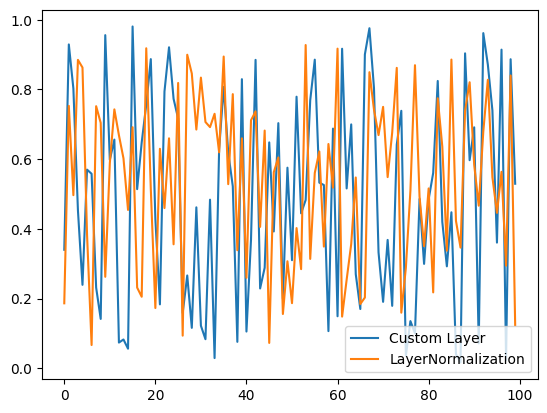

In [12]:
# Testing if the custom layer works the same as LayerNormalization layer in keras

X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)

model1 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[10]),
    MyNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])

model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model1.fit(X, y, epochs=10, verbose=0)

# Now testing if the custom layer works the same as LayerNormalization layer in keras
model2 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[10]),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(X, y, epochs=10, verbose=0)

# show the results on a graph

plt.plot(model1.predict(X), label="Custom Layer")
plt.plot(model2.predict(X), label="LayerNormalization")
plt.legend()
plt.show()
